# Linear regression using SKLearn on your own Data!

This should look familiar... we now are going to use linear regression on some of our own features. I recommend walking through the code below first, then importing your dataset and working through the same problem with your data!



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

# Data Loading, Cleaning, and Setup

In [7]:
df = pd.read_csv("../../NKI_cleaned.csv")

In [8]:
df.tail()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
267,s71,308,48,1,2.6083,1.982204,1,0,1,1,...,-0.695745,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889
268,s72,309,39,1,5.5041,3.028063,0,0,1,1,...,-0.743322,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989
269,s73,310,50,1,2.6192,2.149213,0,0,1,1,...,-0.778710,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792
270,s75,311,52,1,2.2905,2.209446,0,1,1,1,...,-0.614775,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088
271,s76,312,52,1,3.7370,2.127310,0,0,1,1,...,-0.234388,0.181319,-0.030782,-1.035581,-0.521642,-0.301661,-0.060805,0.794952,-1.089303,-0.326193


In [9]:
X = df["timerecurrence"].to_numpy()

In [16]:
Y = df["survival"].to_numpy()

In [11]:
X.shape

(272,)

In [17]:
Y.shape

(272,)

### Data Splitting



In [18]:
idx = np.arange(len(X))

In [19]:
np.random.shuffle(idx)

In [20]:
idx

array([123, 246, 183, 140, 237,  52,  11, 186,  30, 122, 167, 160, 154,
       202, 270, 138, 231,  16,  26,   7, 193, 159,  57, 252, 174, 108,
        33, 216,  12,  80,  83, 198, 172, 228,  43, 255, 100,   2, 169,
        36, 240, 205,  19,  28,   3, 209,  27, 262, 177, 264,  71, 156,
        86, 223,  69, 247, 254,  94,   9, 164, 179, 150, 256, 242,  56,
        82,  37,   5,  98, 165, 243, 147,  34, 116, 269, 114,  22,  42,
        88, 235,  10, 203,  51, 136,  93, 119, 175,  47, 162,  14, 211,
        77, 221, 253, 111, 144, 176, 188, 206, 157, 187,   6,  50, 229,
       101, 217,  13, 163, 233, 201, 248,  45, 225,  70, 137, 195, 171,
       168, 182,  95, 250, 170, 224, 257, 130,  84, 226, 271,  32,  85,
       118, 166, 236, 125, 214, 265, 106, 190, 244, 133, 192, 251, 197,
       266, 141, 178,  35, 238,  74,  75, 145, 267,  58, 185, 260, 220,
       194,  38, 115, 129,  54, 161, 212,  78,  73, 213, 104, 222,  96,
       184,  76, 120, 200, 152, 103, 234,   4, 208,  20,  53,  2

In [21]:
split_threshold = int(len(X) * 0.8)

In [22]:
split_threshold

217

In [23]:
train_idx = idx[:split_threshold]

In [24]:
test_idx = idx[split_threshold:]

In [25]:
x_train = X[train_idx]

In [30]:
y_train = Y[train_idx]

In [28]:
x_test = X[test_idx]

In [31]:
y_test = Y[test_idx]

In [32]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# Linear Regression with Scikit-learn's linear regression

We can use Scikit-Learn’s Linear Regression to fit the model. Most other models we will use in the course 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Split the data

Our model should ignore 20% of data points to use for testing so it doesn't just memorize the data. We need to make sure there are no missing data points before continuing.



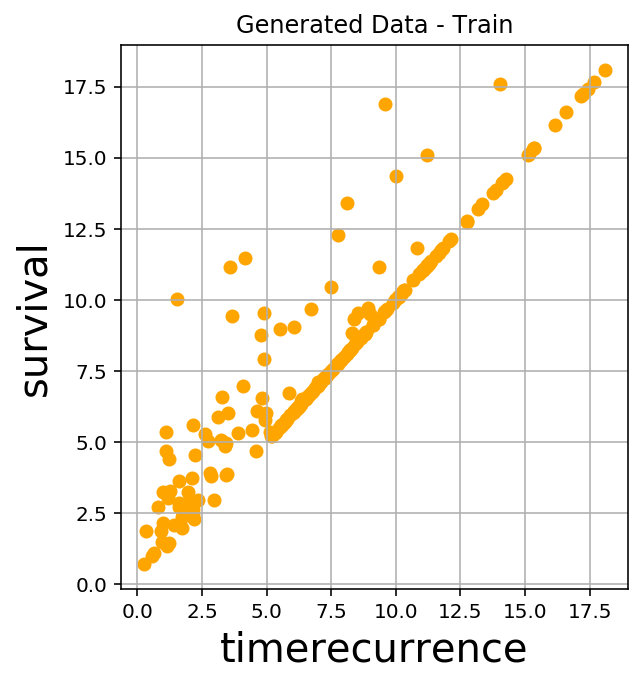

In [33]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('timerecurrence', fontsize = 20) 
plt.ylabel('survival', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')



### Creating and Fitting

In [0]:
from sklearn.linear_model import LinearRegression
#Create the model object
linr = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[39.36562799] [-0.15297545]


### Creating Predictions
Predict outputs on our x_test data that we held out. Think of this as a way to see how the model does on new data!

In [0]:
# Predicting using SKLearn
y_hat = linr.predict(x_test)

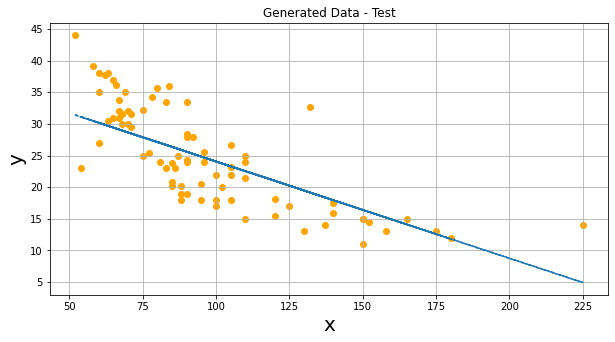

In [0]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

### Results and Evaluation
One way to see if the model is pretty good is the coefficient of determination (R^2) using the `score()` function. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score.

Another way is to compare our mean absolute error (MAE). MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

Read some more about regression model metrics [here](http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/).

In [0]:
print(linr.score(x_test, y_test))

0.5749959307112218


In [37]:
MAE = np.mean(abs(y_test - y_hat))
MAE

NameError: name 'y_hat' is not defined

In [38]:
filename = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'

my_data = pd.read_csv(filename) #TODO: read in your file by replacing the filename variable with your file's path. You can also use this current code to work on an automobile dataset! 

In [39]:
my_data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')

# SVM & Random Forest



In [40]:
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [41]:
#cleaning the data -- dropping missing and duplicate values for sanity
my_data.dropna(inplace = True)
my_data.drop_duplicates(inplace = True)
my_data = my_data.reset_index(drop=True)
length = len(my_data.index) #save length of array of later

In [42]:
my_data["mpg"].min()

9.0

In [43]:
my_data["mpg"].max()

46.6